In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

#bazı parametreleri geçici olarak hafızada tutmamız gerekecek bunu unutmamamız gerekiyor.

Tabii, aşağıdaki kodu satır satır açıklayalım:

```python
import numpy as np
```
Bu satır, NumPy adlı Python kütüphanesini içe aktarır. NumPy, çok boyutlu dizilerle çalışmak için kullanılır ve bu kodun içinde muhtemelen matematiksel işlemler yapmak için kullanılacaktır.

```python
import h5py
```
Bu satır, h5py adlı bir Python kütüphanesini içe aktarır. h5py, Hierarchical Data Format (HDF) dosyalarını işlemek için kullanılır. Bu kodda muhtemelen verilerin bir HDF5 dosyasından okunacağı veya bir HDF5 dosyasına yazılacağı düşünülmektedir.

```python
import matplotlib.pyplot as plt
```
Bu satır, Matplotlib kütüphanesinin bir parçasını içe aktarır. Matplotlib, grafikler ve görsellemeler oluşturmak için kullanılır. Bu kodda grafiği çizmek ve görsel sonuçları görüntülemek amacıyla kullanılacaktır.

```python
plt.rcParams['figure.figsize'] = (5.0, 4.0)
```
Bu satır, Matplotlib'teki grafik boyutlarını belirler. `figsize` özelliği, çizilen grafiklerin genişlik ve yükseklik boyutlarını ayarlar. Bu kod, varsayılan grafik boyutunu (5.0 birim genişlik ve 4.0 birim yükseklik) belirler.

```python
plt.rcParams['image.interpolation'] = 'nearest'
```
Bu satır, görüntü interpolasyonunu (nesne konumlarının tahmini) 'nearest' olarak ayarlar. 'nearest', piksel değerlerini daha yakındaki piksel değerlerine dayalı olarak tahmin eder. Bu, görüntülerin daha sert ve pikselsiz görünmesini sağlar.

```python
plt.rcParams['image.cmap'] = 'gray'
```
Bu satır, görüntü renk haritasını (colormap) 'gray' olarak ayarlar. 'gray' renk haritası, siyah-beyaz görüntüler için uygun bir renk paletti sağlar. Bu, çizilen görüntülerin siyah-beyaz olarak görüntülenmesini sağlar.

```python
np.random.seed(1)
```
Bu satır, NumPy kütüphanesindeki rastgele sayı üretecinin (random number generator) başlangıç durumunu belirler. Bu, rastgele sayıları oluştururken tekrarlanabilir sonuçlar elde etmek için kullanılır. `1` burada başlangıç durumunu temsil eder ve aynı başlangıç durumu kullanıldığında aynı rastgele sayılar elde edilir.

In [3]:
#ilk önce sıfırla piksel doldurma işlemlerimizi yapalım, bir fonksiyon tanımlayalım

def zero_pad(x, pad):
    x_pad = np.pad(x, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = 0)

    return x_pad

Bu Python fonksiyonu, bir girdi dizisini (X) çevreleyen bir sıfır dolgu (zero padding) işlemi gerçekleştirir. Zero padding, genellikle sinir ağı modellemesi ve görüntü işleme gibi alanlarda kullanılır. İşte bu fonksiyonun açıklamaları:

```python
def zero_pad(X, pad):
```

Bu satır, `zero_pad` adlı bir Python fonksiyonu tanımlar. Bu fonksiyon iki parametre alır: `X` (diziyi temsil eder) ve `pad` (sıfır dolgu miktarını temsil eder).

```python
X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values)
```

Bu satır, NumPy kütüphanesi kullanılarak veriyi sıfırlarla çevreleyen bir işlemi gerçekleştirir. `np.pad()` işlevi, dört parametre alır:

- `X`: Sıfırlarla dolgu yapılacak giriş verisi (dizi).
- `((0,0), (pad,pad), (pad,pad), (0,0))`: Dolgu miktarını ve dolgu yönünü belirleyen bir dört'lü (tuple) olarak belirtilen bir dizi. Her bir öğe, sırasıyla öncesi, yükseklik (satır), genişlik (sütun) ve sonrası dolgu miktarını temsil eder. `(0,0)` sıfır öncesi ve sonrası dolgu anlamına gelirken, `(pad, pad)` yükseklik ve genişlik boyutlarında dolgu anlamına gelir. Bu, yatay ve dikey yönde eşit miktarda dolgu yapmayı sağlar.
- `'constant'`: Dolgu yöntemini belirten bir dize. 'constant', sıfır dolgu yapılmasını ifade eder.
- `constant_values`: Dolgu değerini belirten bir dize veya sayı. Bu, sıfır dolgu yapılacağı için genellikle 0'dır.

Bu işlem sonucunda `X_pad`, sıfırlarla dolgu yapılmış veriyi temsil eden bir yeni dizi olur.

```python
return X_pad
```

Bu satır, işlem sonucunda oluşturulan sıfırlarla dolgu yapılmış veriyi `X_pad` değişkeniyle döndürür. Yani, bu fonksiyon çağrıldığında, sıfırlarla dolgu yapılmış veriyi alabilirsiniz.

x.shape = (4, 3, 3, 2)
x_pad.shape =  (4, 7, 7, 2)
x_pad[1,1] =  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


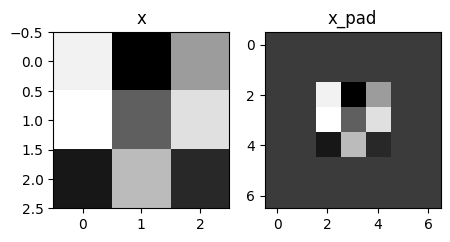

In [4]:
np.random.seed(1)
x = np.random.randn(4,3,3,2) # x dizisi 4 örneğin her biri 3x3 piksel boyutunda ve her bir pikselde 2 derinlik değeri içeren bir veri kümesini temsil ediyor gibi görünüyor.
x_pad = zero_pad(x, 2)

print("x.shape =", x.shape)
print("x_pad.shape = ", x_pad.shape)
print("x_pad[1,1] = ", x_pad[1,1])

fig, axarr = plt.subplots(1,2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])


Bu kod parçası, veri kümesi üzerinde sıfır dolgu (zero padding) işlemini uygulayan bir örneği içerir. Sıfır dolgu işlemi, veri kümesinin etrafına sıfır değerler ekleyerek verinin boyutunu artırır. İşte bu kodun adım adım açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `x = np.random.randn(4, 3, 3, 2)`: Rastgele sayılardan oluşan bir 4 boyutlu NumPy dizisi oluşturulur. Bu dizi 4 örnek içerir. Her bir örnek, 3x3 piksel boyutuna ve her pikselde 2 derinlik değerine sahiptir. Yani, bu veri kümesi 4 örneğin her birinin 3x3 piksel boyutunda olduğunu ve her pikselde 2 derinlik değerine sahip olduğunu temsil eder.

3. `x_pad = zero_pad(x, 2)`: `zero_pad` işlemi, `x` veri kümesine sıfır dolgu ekler. İkinci argüman olarak 2 verilmiştir, bu da verinin etrafına her boyutta 2 birim sıfır dolgu yapılacağı anlamına gelir. Yani, her boyutta 2 piksel eklenir.

4. `print("x.shape =", x.shape)`: İlk olarak, orijinal veri kümesinin boyutu (`x`'in şekli) yazdırılır. Bu, (4, 3, 3, 2) şeklinde bir dört boyutlu dizi olduğunu gösterir.

5. `print("x_pad.shape =", x_pad.shape)`: Ardından, sıfır dolgu işlemi uygulandıktan sonra veri kümesinin boyutu (`x_pad`'in şekli) yazdırılır. Bu, sıfır dolgu eklenmiş bir verinin boyutunu gösterir ve sonuç olarak (4, 7, 7, 2) bir şekil elde edilir.

6. `print("x[1,1] =", x_pad[1,1])`: Veri kümesinin sıfır dolgu uygulanmış hali olan `x_pad` içindeki bir örneğin (1, 1) konumundaki değerler yazdırılır.

7. `fig, axarr = plt.subplots(1, 2)`: İki resim (görüntü) için bir çerçeve oluşturulur.

8. `axarr[0].set_title('x')`: İlk resim çerçevesinin başlığı "x" olarak ayarlanır.

9. `axarr[0].imshow(x[0, :, :, 0])`: İlk resim çerçevesine, orijinal veri kümesinin (0. örnek, tüm yükseklik ve genişlik, 0. derinlik kanalı) görüntüsü eklenir.

10. `axarr[1].set_title('x_pad')`: İkinci resim çerçevesinin başlığı "x_pad" olarak ayarlanır.

11. `axarr[1].imshow(x_pad[0, :, :, 0])`: İkinci resim çerçevesine, sıfır dolgu uygulandıktan sonra veri kümesinin (0. örnek, tüm yükseklik ve genişlik, 0. derinlik kanalı) görüntüsü eklenir.

Bu kod, veri kümesine sıfır dolgu ekleyerek verinin boyutunu artırır ve orijinal veri ile sıfır dolgu eklenmiş verinin görüntülerini görselleştirir. Sıfır dolgu, veri kümesinin kenarlarına eklenen sıfır pikselleri temsil eder.

In [20]:
#bir konvolüsyon işlemi tanımlayalım
#fonksiyonumuzun içinde tek adımlı bir evrişim işlemi gerçekleştireceğiz

def conv_single_step(a_slice_prev, W,b): # a_slice_prev : giriş matrisimiz, ağırlıklar, bias

    s = np.multiply(a_slice_prev, W) #giriş matrisi ile ağırlıklarımızı çarpacağız

    # toplama işlemi
    Z = np.sum(s)

    Z = float(b)+ Z

    return Z



In [21]:
np.random.seed(1)

a_slice_prev = np.random.randn(4, 4, 3)

W = np.random.randn(4, 4, 3) #ağırlık matrisimizin kanal sayısı ile giriş matrisinin kanal sayısı eşit olmalı

b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z) #giriş matrismin filtrelerle çarpılıp bias ile toplanmış hali

Z = -6.999089450680221


np.multiply numpy kütüphanesinin bir işlemidir ve iki diziyi eleman bazında çarpar. Bu işlem, iki dizinin şekilleri uyumlu olduğunda gerçekleştirilir ve sonuç, her iki dizinin aynı konumundaki elemanlarının çarpımından oluşur. Özellikle, her iki dizinin aynı şekle sahip olması gerekmektedir.

Bu kod, tek bir konvolüsyon adımını hesaplayan bir Python işlevini tanımlar ve ardından bu işlemi bir örnekle uygular. İşte kodun ayrıntılı açıklaması:

1. `def conv_single_step(a_slice_prev, W, b)`: `conv_single_step` adlı bir işlev tanımlanıyor. Bu işlev, tek bir konvolüsyon adımını gerçekleştirir ve üç parametre alır:
   - `a_slice_prev`: Giriş matrisinin bir dilimini temsil eder. Önceki katmandan gelen verileri içerir.
   - `W`: Ağırlık matrisini temsil eder. Bu ağırlıklar, konvolüsyon işlemi sırasında giriş matrisiyle çarpılacaktır.
   - `b`: Bias terimini temsil eder.

2. `s = np.multiply(a_slice_prev, W)`: Giriş matrisi (`a_slice_prev`) ile ağırlık matrisi (`W`) eleman bazında çarpılır. Bu işlem, konvolüsyon işleminin bir parçasıdır ve sonuç, `s` adlı bir dizi içinde saklanır.

3. `Z = np.sum(s)`: `s` dizisindeki tüm elemanlar toplanarak bir skalar değer olan `Z` oluşturulur. Bu, konvolüsyon işleminin bir sonucudur.

4. `Z = float(b) + Z`: Elde edilen skaler değeri, bias terimi (`b`) ile toplar. Bias, her bir konvolüsyon işlemi sonrasında eklenen bir sabit değerdir.

5. `return Z`: Hesaplanan sonuç `Z`, işlevden döndürülür.

6. `np.random.seed(1)`: Rastgele sayı üretimi için numpy kütüphanesinin rastgele sayı üreteciye bir başlangıç değeri atanır. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

7. `a_slice_prev`, `W`, ve `b` adlı örnek veriler tanımlanır. Örneğin, giriş matrisi `a_slice_prev`, 4x4x3 şeklinde rastgele sayılarla doldurulur. Ayrıca, ağırlık matrisi `W` ve bias terimi `b` de rastgele sayılarla doldurulur.

8. `Z = conv_single_step(a_slice_prev, W, b)`: Önce tanımladığınız `conv_single_step` işlevi, örnek verilerle çağrılır ve tek bir konvolüsyon adımının sonucu `Z` değişkenine atılır.

9. `print("Z =", Z)`: Hesaplanan konvolüsyon sonucu `Z`, ekrana yazdırılır. Lütfen dikkat edin, `z` yerine `Z` büyük harfle yazılmalıdır çünkü Python'da değişken isimleri büyük-küçük harf duyarlıdır.

In [44]:
def conv_forward(A_prev, W, b, hparameters):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    (f, f, n_C_prev, n_C) = W.shape


    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = int(((n_H_prev-f+2*pad)/stride)+1)
    n_W = int(((n_W_prev-f+2*pad)/stride)+1)

    Z = np.zeros([m,n_H,n_W,n_C])


    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):

                    vert_start = h*stride
                    vert_end = vert_start + f
                    horiz_start = w*stride
                    horiz_end = horiz_start + f


                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end]


                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])


    assert(Z.shape == (m, n_H, n_W, n_C))


    cache = (A_prev, W, b, hparameters)

    return Z, cache

Bu kod, konvolüsyon (convolution) işleminin ileri geçişini gerçekleştiren bir Python işlemini tanımlar. İşte kodun ayrıntılı açıklaması:

1. İşlev, dört ana girdi parametresi alır:
   - `A_prev`: Önceki katmandan gelen giriş veri setini temsil eder. Bu veri seti dört boyutlu bir dizedir ve şu şekilde tanımlanır: `(m, n_H_prev, n_W_prev, n_C_prev)`:
     - `m`: Minibatch boyutu (örnek sayısı).
     - `n_H_prev`: Giriş veri setinin yükseklik (height) boyutu.
     - `n_W_prev`: Giriş veri setinin genişlik (width) boyutu.
     - `n_C_prev`: Giriş veri setinin kanal (channel) sayısı (örneğin, RGB gibi bir görüntü için 3 kanal).

   - `W`: Konvolüsyon filtrelerini temsil eder. Bu dizi şu şekilde tanımlanır: `(f, f, n_C_prev, n_C)`:
     - `f`: Her bir filtre (kernel) için yükseklik ve genişlik boyutu.
     - `n_C_prev`: Giriş veri setinin kanal sayısı (önceki katmandan gelen).
     - `n_C`: Filtrelerin sayısı.

   - `b`: Bias terimini temsil eder. Bu dizi, her bir filtre için bir bias değeri içerir ve şekli `(1, 1, 1, n_C)` olarak tanımlanır.

   - `hparameters`: Hiperparametreleri içeren bir sözlüktür:
     - `stride`: Filtrelerin kaydırılma adımını belirler.
     - `pad`: Giriş veri setinin etrafına eklenen dolgu miktarını belirler.

2. İşlev içinde, giriş veri seti (`A_prev`) ve konvolüsyon filtrelerinin (`W`) boyutlarına erişilir ve gerekli değişkenler tanımlanır. Özellikle, çıkış veri setinin boyutları (`n_H` ve `n_W`) hesaplanır.

3. Boş bir çıkış veri seti (`Z`) oluşturulur. Bu dizi, sonuçları depolamak için kullanılır ve şekli `(m, n_H, n_W, n_C)` olarak tanımlanır.

4. `A_prev` veri setine dolgu eklenir ve bu eklenmiş veri seti `A_prev_pad` adında bir dizi olarak saklanır. Dolgu, giriş veri setinin etrafına eklenir ve boyutlarına uygun hale getirilir.

5. Dört döngü iç içe yer alır ve konvolüsyon işlemi yapılır. İç içe döngüler şunları temsil eder:
   - İlk döngü (i): Minibatch boyutuna (m) göre döngü yapar.
   - İkinci döngü (h): Çıkış yüksekliğine (`n_H`) göre döngü yapar.
   - Üçüncü döngü (w): Çıkış genişliğine (`n_W`) göre döngü yapar.
   - Dördüncü döngü (c): Filtre sayısına (`n_C`) göre döngü yapar.

6. Her bir konvolüsyon adımı, aşağıdaki adımları içerir:
   - Dilimleme işlemi: Giriş veri seti üzerinde filtrenin uygulandığı dilim alınır.
   - Konvolüsyon işlemi: Filtre, dilimleme sonucuyla çarpılır.
   - Toplama işlemi: Çıkan sonuçlar toplanarak çıkış veri setine kaydedilir.

7. Son olarak, `Z` dizisinin şekli kontrol edilir ve bir `cache` tuple'ı oluşturulur. `cache` tuple'ı, işlem sırasında kullanılan verileri ve hiperparametreleri saklar.

8. `Z` dizisi ve `cache` tuple'ı işlevden döndürülür.

Bu işlev, giriş veri seti üzerinde konvolüsyon işlemi yapar ve çıkış veri setini oluşturur. Çıkış veri seti, konvolüsyon katmanından sonraki katmana iletilir ve genellikle aktivasyon işlemine tabi tutulur.

In [45]:
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)

hparameters = {"pad" : 2,
               "stride" : 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

print("Z'nin ortalama =", np.mean(Z))
print("Z[3, 2, 1] = ", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z'nin ortalama = 0.048995203528855794
Z[3, 2, 1] =  [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


Bu kod, verilen giriş veri seti (`A_prev`), konvolüsyon filtreleri (`W`), bias terimleri (`b`) ve hiperparametreler (`hparameters`) kullanılarak konvolüsyon işleminin ileri geçişini gerçekleştiriyor. İşte kodun ayrıntılı açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `A_prev`, `W`, ve `b` dizileri oluşturulur:
   - `A_prev`: Giriş veri setini temsil eder. Bu dizi 10 örnek içerir, her biri 4x4 boyutunda ve her bir örneğin 3 kanalı (RGB gibi) bulunur. Bu veri seti rastgele sayılarla doldurulur.
   - `W`: Konvolüsyon filtrelerini temsil eder. Her bir filtre 2x2 boyutunda ve 3 kanala sahiptir. Toplamda 8 farklı filtre bulunur ve bu filtreler de rastgele sayılarla doldurulur.
   - `b`: Bias terimini temsil eder. Her bir filtre için bir bias değeri bulunur.

3. `hparameters` sözlüğü tanımlanır:
   - `pad`: Dolgu miktarını belirler. Bu örnekte, pad değeri 2 olarak ayarlanmıştır, yani giriş veri setinin etrafına 2 birim dolgu eklenir.
   - `stride`: Adım miktarını belirler. Bu örnekte, stride değeri 2 olarak ayarlanmıştır, yani filtreler her iki birimde bir kaydırılarak konvolüsyon işlemi gerçekleştirilir.

4. `conv_forward` işlevi çağrılır:
   - Bu işlev, giriş veri seti (`A_prev`), konvolüsyon filtreleri (`W`), bias terimleri (`b`) ve hiperparametreler (`hparameters`) ile çağrılır.
   - İleri geçiş işlemi gerçekleştirilir ve sonuçlar `Z` adlı bir diziye (çıkış veri seti) kaydedilir. Ayrıca, işlem sırasında kullanılan veriler ve hiperparametreler `cache_conv` adlı bir tuple içinde saklanır.

5. `Z` dizisinin ortalaması hesaplanır ve yazdırılır. Bu, konvolüsyon işlemi sonucunda elde edilen çıkışın ortalamasını ifade eder.

6. `Z` dizisinin belirli bir konumdaki değeri (`Z[3, 2, 1]`) yazdırılır. Bu, çıkış veri setinin belirli bir konumundaki değeri ifade eder.

7. `cache_conv` tuple'ının belirli bir konumundaki değeri (`cache_conv[0][1][2][3]`) yazdırılır. Bu tuple, işlem sırasında kullanılan verilerin saklandığı bir yapıdır.

Sonuç olarak, bu kod, verilen giriş veri seti ve filtreler ile konvolüsyon işlemini gerçekleştirir ve çıkışı (`Z`) hesaplar. Bu çıkış daha sonra genellikle bir aktivasyon fonksiyonuna (örneğin ReLU) geçirilir ve ardından bir sonraki katmana iletilir. Ayrıca, bu işlem sırasında kullanılan verileri ve hiperparametreleri saklamak için bir önbellek (`cache_conv`) oluşturur.

In [46]:
def pool_forward(A_prev, hparameters,mode = "max"):

  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

  f = hparameters["f"]
  stride = hparameters["stride"]

  n_H = int(1 + (n_H_prev -f)/ stride)
  n_W = int(1 + (n_W_prev -f)/ stride)
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))

  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):

          vert_start = h*stride
          vert_end = vert_start +f
          horiz_start = w*stride
          horiz_end = horiz_start +f

          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

          if mode == "max":
            A[i,h, w, c] = np.max(a_prev_slice)
          elif mode == "average":
            A[i,h, w, c] = np.mean(a_prev_slice)

  cache = (A_prev, hparameters)

  assert(A.shape == (m, n_H, n_W, n_C))

  return A, cache

Bu fonksiyon, havuzlama (pooling) işleminin ileri besleme aşamasını gerçekleştirir. Havuzlama işlemi, giriş verisini küçültmek ve önemli özellikleri vurgulamak amacıyla kullanılır. Fonksiyonun detaylarını şu şekilde açıklayabiliriz:

- `A_prev`: Giriş verisi olan A_prev, şekli `(m, n_H_prev, n_W_prev, n_C_prev)` olan bir dizi (tensor) olarak kabul edilir. Burada `m`, örnek sayısını; `n_H_prev` ve `n_W_prev`, giriş verisinin yükseklik ve genişlik boyutlarını; `n_C_prev`, giriş verisinin kanal (derinlik) sayısını temsil eder.

- `hparameters`: Havuzlama işlemi için kullanılan hiperparametreleri içeren bir sözlüktür. Bu sözlük içinde `f` (pencere boyutu) ve `stride` (adım sayısı) bilgileri bulunur.

- `mode`: Havuzlama modunu belirleyen bir parametredir. Varsayılan olarak "max" olarak ayarlanmıştır. Diğer bir seçenek "average" olabilir.

Fonksiyonun gerçekleştirdiği işlem şu adımlardan oluşur:

1. Havuzlama işlemi sonucunda oluşacak çıkış verisinin boyutlarını hesaplar. `n_H` ve `n_W` değerlerini bu hesaplamalarla belirler.

2. Çıkış verisi için bir sıfır tensorü (`A`) oluşturur. Bu tensorün şekli `(m, n_H, n_W, n_C)` olacaktır.

3. `for` döngüleri içinde her bir örneğin, yükseklik, genişlik ve kanal boyutlarına göre havuzlama işlemini gerçekleştirir. Yani, her bir örneğin her bir bölgesinde havuzlama işlemi yapılır.

4. Havuzlama işlemi, verilen `f` (pencere boyutu) ve `stride` (adım sayısı) değerlerine göre yapılır. Bu işlem sırasında, belirli bir bölge (pencere) seçilir ve bu bölgedeki özellikler üzerinden işlem yapılır.

5. `mode` değerine göre, her bir bölge için ya maksimum değer (`np.max`) alınır ve `A` tensorüne kaydedilir ya da ortalama değer (`np.mean`) alınır ve `A` tensorüne kaydedilir.

6. Son olarak, hesaplanan çıkış tensorü (`A`) ve giriş verisi (`A_prev`) ile kullanılan hiperparametreler (`hparameters`) bir tuple olarak `cache` değişkenine kaydedilir.

7. Son olarak, `assert` ifadesi ile çıkış tensorünün beklenen boyuta sahip olduğu kontrol edilir ve fonksiyon çıkış verisi olarak `A` tensorünü ve `cache` tuple'ını döndürür.

Bu fonksiyon, havuzlama işlemini ileri besleme aşamasında uygular ve çıkışı döndürür. Havuzlama işlemi, veri boyutunu küçültmek ve önemli özellikleri vurgulamak için kullanılan bir işlemdir.

**Farklı ortaklama tipleri için sonuçları karşılaştıralım!**

In [47]:
np.random.seed(1)

A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f" :3}

A, cache = pool_forward(A_prev, hparameters)

print("mod = max")
print("A= ", A)

A, cache = pool_forward(A_prev, hparameters, mode = "average")

print("mod = average")
print("A =", A)


mod = max
A=  [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]
mod = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


Bu kod, havuzlama (pooling) işleminin iki farklı modu ("max" ve "average") kullanılarak uygulandığını gösteriyor. İşte kodun ayrıntılı açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `A_prev`: Giriş veri setini temsil eder. Bu veri seti 2 örnek içerir, her biri 4x4 boyutunda ve her bir örneğin 3 kanalı (RGB gibi) bulunur. Bu veri seti rastgele sayılarla doldurulur.

3. `hparameters` sözlüğü tanımlanır:
   - `stride`: Havuzlama penceresinin kaydırılma adımını belirler. Bu örnekte, stride değeri 2 olarak ayarlanmıştır, yani havuzlama penceresi her iki birimde bir kaydırılarak havuzlama işlemi gerçekleştirilir.
   - `f`: Havuzlama penceresinin boyutunu (yükseklik ve genişlik) belirler. Bu örnekte, pencere boyutu 3x3 olarak ayarlanmıştır.

4. `pool_forward` işlevi iki farklı şekilde çağrılır:

   - İlk çağrıda, varsayılan olarak "max" modu kullanılır:
     ```
     A, cache = pool_forward(A_prev, hparameters)
     ```
     Bu işlem, giriş veri seti `A_prev` üzerinde maksimum havuzlama işlemi uygular.

   - İkinci çağrıda, "average" modu kullanılır:
     ```
     A, cache = pool_forward(A_prev, hparameters, mode="average")
     ```
     Bu işlem, giriş veri seti `A_prev` üzerinde ortalama havuzlama işlemi uygular.

5. Havuzlama işleminin sonucu (`A`) yazdırılır. İlk çağrıda "max" modu kullanıldığında, maksimum değerlerle doldurulmuş bir çıkış elde edilir. İkinci çağrıda "average" modu kullanıldığında, pencere içindeki değerlerin ortalamasıyla doldurulmuş bir çıkış elde edilir.

Bu kod, havuzlama işleminin farklı modlarını uygulayarak giriş veri setini küçültme veya özelliklerin öne çıkarılması amacıyla kullanır. Maksimum havuzlama, giriş veri setinin her pencere için maksimum değeri seçerken, ortalama havuzlama pencere içindeki değerlerin ortalamasını alır. Bu işlemler, özellik haritalarını küçültmek ve önemli özellikleri korumak için sıkça kullanılır.

**Geriye Yayılım Algoritması için Fonksiyon Tanımlayalım!**

In [48]:
def conv_backward(dZ, cache):



    (A_prev, W, b, hparameters) = cache


    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape


    (f, f, n_C_prev, n_C) = W.shape


    stride = hparameters['stride']
    pad = hparameters['pad']


    (m, n_H, n_W, n_C) = dZ.shape

    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f,f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))


    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)

    for i in range(m):


        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]

        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):


                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f


                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]


                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]

        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]


    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))

    return dA_prev, dW, db

Bu kod, evrişimsel sinir ağı (CNN) katmanlarından birinin geriye doğru (backpropagation) geçişini gerçekleştiren bir Python işlemini tanımlar. İşte kodun ayrıntılı açıklaması:

1. `conv_backward` işlevi, üç ana girdi parametresi alır:
   - `dZ`: Bu, CNN katmanının çıkışındaki hata türevlerini (gradients) temsil eder. Yani, katmanın çıkışından geriye doğru gelen hata sinyalidir.
   - `cache`: İleri geçiş sırasında hesaplamalarda kullanılan verileri ve hiperparametreleri içeren bir tuple'dır. Bu veriler şunları içerir: `A_prev` (önceki katmandan gelen giriş veri seti), `W` (konvolüsyon filtreleri), `b` (bias terimleri) ve `hparameters` (hiperparametreler).

2. İlk olarak, cache'ten gerekli veriler (A_prev, W, b ve hparameters) alınır. Bu veriler ileri geçiş sırasında hesaplamalarda kullanılmıştır.

3. Giriş veri setinin boyutları ve konvolüsyon filtrelerinin boyutlarından gerekli bilgiler çıkarılır. Özellikle, çıkış veri setinin boyutları (`m`, `n_H`, `n_W`, ve `n_C`) hesaplanır.

4. Değişkenler `dA_prev`, `dW` ve `db` oluşturulur. Bunlar sırasıyla önceki katmana iletilen hata türevleri, filtrelerin türevleri ve bias terimlerinin türevleri için kullanılır. Bu değişkenler başlangıçta sıfırlarla doldurulur.

5. Önceki katmandan gelen giriş veri seti (`A_prev`) ve hata türevleri (`dA_prev`) üzerinde dolgu (zero-padding) uygulanır. Dolgu miktarı, `pad` hiperparametresinden alınır.

6. Üç iç içe döngü (i, h, w) ile giriş veri setinin her bir öğesine ve her bir konvolüsyon çekirdeği filtresine erişilir. Ayrıca, çıkış kanalları (`n_C`) üzerinde de döngü yapılır.

7. Her bir adımda şu işlemler gerçekleştirilir:
   - Dilimleme işlemi: Giriş veri setinin belirli bir penceresi alınır ve bu pencere `a_slice` değişkenine atanır.
   - Hata türevlerinin hesaplanması: Hata türevleri, çıkış kanalındaki (`n_C`) hata türevleri ile filtre değerleri (`W`) arasındaki çarpımın toplamı olarak hesaplanır ve ilgili `dA_prev` ve `dW` değişkenlerine eklenir.
   - Bias terimi türevlerinin hesaplanması: Bias terimi türevleri, çıkış kanalındaki hata türevlerinin toplamıdır ve `db` değişkenine eklenir.

8. Hata türevlerinin `dA_prev` içindeki dolgu (padding) kısmı kaldırılarak, sonuç olarak `dA_prev` hesaplanır.

9. Son olarak, `dA_prev`, `dW` ve `db` döndürülür.

Bu işlev, konvolüsyon katmanının geriye doğru geçişini gerçekleştirerek önceki katmana iletilen hata türevlerini hesaplar. Bu, eğitim sırasında ağırlıkların ve bias terimlerinin güncellenmesine yardımcı olan bir adımdır. Geriye doğru geçiş, ağın eğitimi sırasında gradientleri hesaplamak için kullanılır.

In [49]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)

print("dA ortalama =", np.mean(dA))
print("dW ortalama =", np.mean(dW))
print("db ortalama =", np.mean(db))

dA ortalama = 0.6347704472654743
dW ortalama = 1.5572657428497354
db ortalama = 7.839232564616838


Bu kod, konvolüsyonel sinir ağı (CNN) katmanının geriye doğru geçişini kullanarak hata türevlerini hesaplar. İşte kodun ayrıntılı açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `dA, dW, db = conv_backward(Z, cache_conv)`: Geriye doğru geçiş işlemini başlatır. Bu işlem, `Z` (katmanın çıkışındaki hata türevleri) ve `cache_conv` (ileri geçiş sırasında kullanılan veriler ve hiperparametreler) parametrelerini kullanır. İşlemin sonucu olarak `dA` (önceki katmana iletilen hata türevleri), `dW` (filtrelerin türevleri) ve `db` (bias terimlerinin türevleri) elde edilir.

3. `print("dA ortalama =", np.mean(dA))`: `dA` değişkeninin ortalama değeri yazdırılır. Bu, hata türevlerinin ne kadar büyük olduğunu veya ne kadar değiştiğini gösterir. Yüksek ortalama değeri, büyük bir hata türevi olduğunu gösterir.

4. `print("dW ortalama =", np.mean(dW))`: `dW` değişkeninin ortalama değeri yazdırılır. Bu, filtrelerin türevlerinin ne kadar büyük olduğunu veya ne kadar değiştiğini gösterir.

5. `print("db ortalama =", np.mean(db))`: `db` değişkeninin ortalama değeri yazdırılır. Bu, bias terimlerinin türevlerinin ne kadar büyük olduğunu veya ne kadar değiştiğini gösterir.

Bu kod parçası, CNN katmanının geriye doğru geçişini kullanarak hata türevlerini hesaplar ve bu hata türevlerinin ne kadar büyük olduğunu değerlendirmek için ortalama değerlerini yazdırır. Bu, ağın eğitimi sırasında gradient tabanlı optimizasyon algoritmaları (örneğin, stokastik gradyan inişi) kullanılarak ağırlıkların ve bias terimlerinin güncellenmesinde yardımcı olur.

In [50]:
def create_mask_from_window(x):

  mask = x == np.max(x)

  return mask

Bu işlev, bir veri penceresini temsil eden bir giriş dizisi olan `x` üzerinde çalışır ve bu pencere içindeki maksimum değere karşılık gelen bir maske oluşturur. İşte bu işlemin nasıl çalıştığının açıklaması:

1. `mask = x == np.max(x)`: Bu satır, giriş dizisi `x` içindeki her öğenin, `x` içindeki maksimum değere eşit olup olmadığını kontrol eder. `np.max(x)` ifadesi, `x` dizisindeki en büyük değeri verir. Sonuç, aynı boyutta bir maske dizisidir ve her öğesi, karşılık gelen `x` öğesinin maksimum değere eşit olup olmadığını gösterir.

   Örnek: Eğer `x` şu şekilde bir diziyse: `x = np.array([1, 3, 2, 3, 5])`, ve `np.max(x)` 5'i veriyorsa, `mask` dizisi şu şekilde olur: `mask = [False, False, False, False, True]`. Bu durumda, maksimum değere karşılık gelen öğe (5) `True` değeriyle işaretlenir.

2. `mask` dizisi son olarak `create_mask_from_window` işlevinin çıkış değeri olarak döndürülür. Bu maske, genellikle maksimum havuzlama (max-pooling) işlemi sırasında kullanılır. Maksimum havuzlama işlemi, giriş veri setindeki her pencere içindeki maksimum değeri seçmek için bu maskeyi kullanır. Bu şekilde, yüksek aktivasyonlu (büyük) özellikler diğerlerine tercih edilir ve öne çıkarılır.

In [51]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)

print('x =', x)
print('maske =', mask)

x = [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
maske = [[ True False False]
 [False False False]]


Bu kod örneği, `create_mask_from_window` işlevini kullanarak rastgele bir veri penceresi üzerinde maksimum değere karşılık gelen bir maske oluşturur ve sonucu görüntüler. İşte kodun ayrıntılı açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `x = np.random.randn(2,3)`: İki satır ve üç sütundan oluşan rastgele bir 2D dizi oluşturur. Bu dizide rastgele sayılar bulunur. `x` dizisi, bir veri penceresini temsil eder.

3. `mask = create_mask_from_window(x)`: `x` dizisi üzerindeki `create_mask_from_window` işlevini çağırarak bir maske oluşturur. Bu maske, `x` dizisindeki her öğenin maksimum değere karşılık gelen bir maske olacak.

4. `print('x =', x)`: `x` dizisini ekrana yazdırır, böylece rastgele veri penceresini görebiliriz.

5. `print('maske =', mask)`: `create_mask_from_window` işlevi tarafından oluşturulan maskeyi ekrana yazdırır. Maske, `x` dizisindeki her öğenin maksimum değere karşılık gelen öğe olup olmadığını gösterir. `True` değeri, maksimum değere karşılık gelirken `False` değeri diğer öğeler için kullanılır.

Örnek çıktı şu şekilde olabilir:

```
x = [[ 1.62434536 -0.61175641 -0.52817175]
     [-1.07296862  0.86540763 -2.3015387 ]]
maske = [[ True False False]
         [False False False]]
```

Bu örnekte, maksimum değere karşılık gelen öğe `True` değeriyle işaretlenmiş ve diğer öğeler `False` değeriyle işaretlenmiştir. Bu maske, maksimum havuzlama (max-pooling) işlemi sırasında kullanılabilir.

In [52]:
def distribute_value(dz, shape):


    (n_H, n_W) = shape


    average = dz / (n_H * n_W)


    a =  np.ones(shape) * average

    return a

Bu kod, bir değeri belirtilen bir şekilde dağıtmak için kullanılan bir işlev olan `distribute_value`'yi tanımlar. İşte bu işlemin nasıl çalıştığının ayrıntılı açıklaması:

1. `dz` ve `shape` adında iki giriş parametresi ile başlar.
   - `dz`: Dağıtılacak değeri temsil eder.
   - `shape`: Bu, dağıtılacak değerin şeklini belirleyen bir tuple'dır ve `(n_H, n_W)` biçimindedir. `n_H` ve `n_W`, değeri dağıtılacak matrisin yükseklik (satır sayısı) ve genişlik (sütun sayısı) boyutlarını temsil eder.

2. `(n_H, n_W) = shape`: `shape` tuple'ındaki değerler `n_H` ve `n_W` değişkenlerine atanır. Bu, dağıtılacak matrisin boyutlarını belirler.

3. `average = dz / (n_H * n_W)`: Verilen değeri `dz`, matrisin boyutlarına (`n_H` ve `n_W`) göre böler ve bu şekilde ortalama değeri hesaplar. Bu, her hücreye eşit bir değer dağıtmak için kullanılır.

4. `a = np.ones(shape) * average`: Dağıtılmış matris `a` oluşturulur. Bu matris, belirtilen şekilde (`shape`) ortalama değeri (`average`) içeren bir matristir. `np.ones(shape)` ifadesi, verilen şekilde tamamen birlerden oluşan bir matris oluşturur ve bu matrisin her öğesine ortalama değeri atar.

5. Son olarak, `a` matrisi `distribute_value` işlevinin çıkış değeri olarak döndürülür. Bu matris, giriş değerini belirtilen şekilde eşit bir şekilde dağıtan matristir.

Bu işlev, özellikle max-pooling işlemi sırasında hata türevlerini hesaplamak için kullanılır. Dağıtma işlemi, maksimum havuzlama işlemi sırasında maksimum değere karşılık gelen hata türevlerini belirlemek için kullanılır.

In [53]:
a = distribute_value(2, (2,2))

print('Dağıtılmış değer =', a)

Dağıtılmış değer = [[0.5 0.5]
 [0.5 0.5]]


Bu kod örneği, `distribute_value` işlemini kullanarak bir değeri belirtilen bir şekilde (2x2 matris şeklinde) dağıtan bir örnek göstermektedir. İşte kodun ayrıntılı açıklaması:

1. `a = distribute_value(2, (2,2))`: `distribute_value` işlevi, bir değeri (2) belirtilen bir şekilde (2x2 matris) dağıtmak için çağrılır. İşlem sonucunda oluşturulan matris `a` değişkenine atanır.

2. `print('Dağıtılmış değer =', a)`: Dağıtılan matris olan `a` ekrana yazdırılır.

Örnek çıktı şu şekilde olabilir:

```
Dağıtılmış değer = [[0.5 0.5]
                   [0.5 0.5]]
```

Bu örnekte, `distribute_value` işlemi, giriş değeri olan 2'yi belirtilen şekilde (2x2 matris) dağıtarak her hücreye eşit bir değer (0.5) atar. Sonuç olarak oluşturulan matris, her hücrede eşit bir değere sahip bir 2x2 matrisdir.

In [54]:
def pool_backward(dA, cache, mode= 'max'):


    (A_prev, hparameters) = cache


    stride = hparameters['stride']
    f = hparameters['f']


    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape


    dA_prev = np.zeros(A_prev.shape)

    for i in range(m):


        a_prev = A_prev[i]

        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):


                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f


                    if mode == "max":


                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]

                        mask = create_mask_from_window(a_prev_slice)

                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += np.multiply(mask, dA[i, h, w, c])

                    elif mode == "average":


                        da = dA[i,h,w,c]

                        shape = (f,f)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)


    assert(dA_prev.shape == A_prev.shape)

    return dA_prev

Bu kod, havuzlama katmanının geriye doğru geçişini gerçekleştiren `pool_backward` işlevini tanımlar. İşte bu işlemin ayrıntılı açıklaması:

1. `pool_backward` işlevi, `dA` (katmandan gelen hata türevleri), `cache` (ileri geçiş sırasında kullanılan veriler ve hiperparametreler) ve `mode` (havuzlama modu, varsayılan olarak "max" olarak ayarlanmış) olmak üzere üç giriş parametresi alır.

2. `(A_prev, hparameters) = cache`: `cache` içerisinde bulunan verileri çıkarır. `A_prev`, önceki katmanın çıkışı olan veriyi temsil eder. `hparameters`, havuzlama işlemi için kullanılan hiperparametreleri içerir.

3. `stride` ve `f` (pencere boyutu) hiperparametreleri `hparameters` içinden çıkarılır.

4. `m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape` ve `m, n_H, n_W, n_C = dA.shape`: İlgili boyutlar alınır. `A_prev` matrisinin boyutları (`n_H_prev`, `n_W_prev`, `n_C_prev`) ve `dA` matrisinin boyutları (`n_H`, `n_W`, `n_C`) alınır.

5. `dA_prev = np.zeros(A_prev.shape)`: Geriye doğru geçiş sırasında hesaplanacak hata türevlerini saklamak için `dA_prev` adında sıfırlardan oluşan bir matris oluşturulur. Bu matris, önceki katmanın hata türevlerini temsil eder.

6. Bir döngü başlatılır ve her örnek için (`i`), havuzlama işlemi geriye doğru uygulanır:
   - `a_prev` içindeki önceki katmanın verisi alınır.
   - `n_H` ve `n_W` boyutlarındaki dA matrisi üzerinde döngü yapılır ve her hücre için:
     - Havuzlama moduna (`mode`) bağlı olarak (maksimum veya ortalama) hata türevleri hesaplanır:
       - Maksimum havuzlama (`mode = "max"`): Maksimum öğenin konumunu bulmak için ilgili pencere içinde maksimum değere sahip olan öğeyi seçen bir maske oluşturulur ve bu maske, dA ile çarpılarak hata türevleri hesaplanır.
       - Ortalama havuzlama (`mode = "average"`): dA'nın değeri pencere boyutuna (`f`) göre bölünerek hata türevleri hesaplanır.

7. `assert(dA_prev.shape == A_prev.shape)`: `dA_prev` ve `A_prev` matrislerinin boyutlarının uygun olduğundan emin olmak için bir doğrulama yapılır.

8. Son olarak, `dA_prev` matrisi `pool_backward` işlevinin çıkış değeri olarak döndürülür. Bu matris, önceki katmana iletilen hata türevlerini içerir.

Bu işlev, havuzlama katmanının geriye doğru geçişini gerçekleştirerek hata türevlerini hesaplar ve bu hata türevlerini önceki katmana iletilmesi için kullanılır. Havuzlama işlemi sırasında maksimum veya ortalama değerlerin hangi hücrelere iletilmesi gerektiği bu işlev aracılığıyla hesaplanır.

**Geriye yayılım ile güncellenen ağırlıklar ve diğer parametreler**

In [55]:
np.random.seed(1)

A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride": 1, "f":2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode= "max")

print("mod = max")
print('dA ortalaması =', np.max(dA))
print('dA_prev[1,1]', dA_prev[1,1])
print()

dA_prev = pool_backward(dA, cache, mode= "average")

print("mod = average")
print('dA ortalaması =', np.mean(dA))
print('dA_prev[1,1]', dA_prev[1,1])

mod = max
dA ortalaması = 2.528325706806398
dA_prev[1,1] [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mod = average
dA ortalaması = 0.14571390272918056
dA_prev[1,1] [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]


Bu kod örneği, havuzlama katmanının geriye doğru geçişini (`pool_backward`) kullanarak hata türevlerinin hesaplanmasını gösteriyor. İşte bu kodun ayrıntılı açıklaması:

1. `np.random.seed(1)`: Rastgele sayı üretecinin başlangıç noktasını belirler. Bu, rastgele sayıların önceden belirlenebilir olmasını sağlar.

2. `A_prev = np.random.randn(5, 5, 3, 2)`: 5x5x3 boyutunda ve 2 kanala sahip rastgele bir giriş verisi (`A_prev`) oluşturur. Bu, havuzlama işlemi sırasında kullanılacak olan giriş verisini temsil eder.

3. `hparameters = {"stride": 1, "f": 2}`: Havuzlama işlemi için hiperparametreleri içeren bir sözlük (`hparameters`) oluşturur. Bu hiperparametreler, adım (stride) ve pencere boyutunu (`f`) belirtir.

4. `A, cache = pool_forward(A_prev, hparameters)`: Havuzlama işlemi (`pool_forward`) kullanılarak giriş verisi (`A_prev`) üzerinde havuzlama işlemi uygulanır. Bu işlem sonucunda havuzlanmış veri (`A`) ve bu işlem sırasında kullanılan öğelerin önbelleği (`cache`) elde edilir.

5. `dA = np.random.randn(5, 4, 2, 2)`: Havuzlama katmanının çıkışına göre hata türevlerini (`dA`) içeren bir rastgele matris oluşturur. Bu matris, havuzlama katmanının çıkışındaki hata türevlerini temsil eder.

6. `dA_prev = pool_backward(dA, cache, mode="max")`: Maksimum havuzlama modu ile geriye doğru geçiş işlemi (`pool_backward`) uygulanır. Bu işlem, `dA` matrisi ve önbellekteki bilgileri (`cache`) kullanarak havuzlama işlemi sırasında oluşturulan hata türevlerini (`dA_prev`) hesaplar.

7. `print("mod = max")`: Maksimum havuzlama modu için sonuçların görüntüleneceğini belirten bir başlık yazdırılır.

8. `print('dA ortalaması =', np.max(dA))`: `dA` matrisinin maksimum değerini yazdırarak bu matrisin istatistiksel bilgilerini görüntüler.

9. `print('dA_prev[1,1]', dA_prev[1,1])`: Havuzlama işlemi sırasında hesaplanan hata türevlerinin (örnek olarak `dA_prev` matrisinin [1,1] hücresi) değerlerini görüntüler.

10. `dA_prev = pool_backward(dA, cache, mode="average")`: Ortalama havuzlama modu ile geriye doğru geçiş işlemi (`pool_backward`) uygulanır. Bu işlem, `dA` matrisi ve önbellekteki bilgileri (`cache`) kullanarak havuzlama işlemi sırasında oluşturulan hata türevlerini (`dA_prev`) hesaplar.

11. `print("mod = average")`: Ortalama havuzlama modu için sonuçların görüntüleneceğini belirten bir başlık yazdırılır.

12. `print('dA ortalaması =', np.mean(dA))`: `dA` matrisinin ortalama değerini yazdırarak bu matrisin istatistiksel bilgilerini görüntüler.

13. `print('dA_prev[1,1]', dA_prev[1,1])`: Havuzlama işlemi sırasında hesaplanan hata türevlerinin (örnek olarak `dA_prev` matrisinin [1,1] hücresi) değerlerini görüntüler.

Bu örnek, havuzlama katmanının geriye doğru geçişini iki farklı modda (maksimum ve ortalama) nasıl uygulanacağını gösterir ve bu işlemlerin sonuçlarını görüntüler.